<div style="display:fill;
            border-radius:15px;
            background-color:#03396c;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 🫁 Lung Cancer 🫁

# <b>1 <span style='color:#6497b1'>|</span> Importing Libraries and Loading dataset</b>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [6]:
data=pd.read_csv('data12.csv')

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | About the dataset</b></p>
</div>

### Attribute information:
Total no. of attributes: **16** <br>
No .of instances:       **309**


01. **Gender**: M(male), F(female)
02. **Age**: Age of the patient
03. **Smoking**: YES=2 , NO=1.
04. **Yellow fingers**: YES=2 , NO=1.
05. **Anxiety**: YES=2 , NO=1.
06. **Peer_pressure**: YES=2 , NO=1.
07. **Chronic Disease**: YES=2 , NO=1.
08. **Fatigue**: YES=2 , NO=1.
09. **Allergy**: YES=2 , NO=1.
10. **Wheezing**: YES=2 , NO=1.
11. **Alcohol**: YES=2 , NO=1.
12. **Coughing**: YES=2 , NO=1.
13. **Shortness of Breath**: YES=2 , NO=1.
14. **Swallowing Difficulty**: YES=2 , NO=1.
15. **Chest pain**: YES=2 , NO=1.
16. **Lung Cancer**: YES , NO.

# <b>2 <span style='color:#6497b1'>|</span> Understanding Our Data</b>

In [7]:
data.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f75843d460>,
 'caps': [<matplotlib.lines.Line2D at 0x1f75843da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f75843d220>],
 'medians': [<matplotlib.lines.Line2D at 0x1f75843e060>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f75843e390>],
 'means': []}

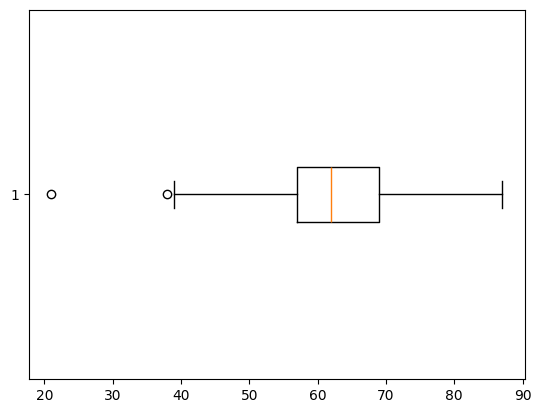

In [9]:
plt.boxplot(data['AGE'], vert=False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [11]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
data.duplicated().sum()


33

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(276, 16)

In [15]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # from sklearn.feature_selection import SelectKBest, chi2

# # Assuming 'target' is the name of your target column
# X = data.drop(columns=['LUNG_CANCER'])  
# y = data['LUNG_CANCER']

# selector = SelectKBest(score_func=chi2, k=4)  # Select 4 best features
# X_selected = selector.fit_transform(X, y)

#chi2_scores = selector.scores_
#feature_names = X.columns

#chi2_df = pd.DataFrame({'Feature': feature_names, 'Chi-Squared Score': chi2_scores})

#chi2_df_sorted = chi2_df.sort_values(by='Chi-Squared Score', ascending=False)

# plt.figure(figsize=(10, 6))
# plt.barh(chi2_df_sorted['Feature'], chi2_df_sorted['Chi-Squared Score'], color='skyblue')
# plt.xlabel('Chi-Squared Score')
# plt.ylabel('Feature')
# plt.title('Chi-Squared Scores for Features')
# plt.grid(axis='x')
# plt.show()


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Encoding of Categorical Columns</b></p>
</div>

**A short preprocessing step before we move on to Exploratory Data Analysis for easy implementation of graphs. Here we are encoding <mark>LUNG_CANCER</mark> and <mark>GENDER</mark> column.**

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER']) #used to compute any necessary parameters
data['GENDER']=encoder.fit_transform(data['GENDER'])
data.head().T

,0,1,2,3,4
GENDER,1,1,0,1,0
AGE,69,74,59,63,63
SMOKING,1,2,1,2,1
YELLOW_FINGERS,2,1,1,2,2
ANXIETY,2,1,1,2,1
PEER_PRESSURE,1,1,2,1,1
CHRONIC DISEASE,1,2,1,1,1
FATIGUE,2,2,2,1,1
ALLERGY,1,2,1,1,1
WHEEZING,2,1,2,1,2


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Changing values of columns from 2,1 to 1,0</b></p>
</div>

In [17]:
con_col = ['AGE']
cat_col=[]
for i in data.columns:
    if i!='AGE':
        cat_col.append(i)

In [18]:

columns_to_transform = [col for col in data.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]


def transform_values(x):
    return 1 if x == 2 else 0

# Apply the transformation to selected columns
data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)


C:\Users\Eng l\AppData\Local\Temp\ipykernel_10280\3987413510.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)


In [19]:
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
132,0,61,1,0,0,0,1,1,1,0,0,0,1,0,0,1
67,1,66,1,0,0,0,0,1,0,1,1,1,1,0,0,1
197,1,59,0,1,1,0,0,1,0,1,0,0,0,1,1,1
182,1,71,0,0,0,0,1,1,1,1,1,1,1,0,1,1
97,1,59,1,0,0,1,0,0,0,0,1,1,1,0,0,1
55,1,52,0,1,1,0,1,0,1,1,1,1,0,1,0,1
128,0,58,1,1,1,1,0,1,0,0,0,1,1,1,0,1
140,0,47,1,1,0,1,1,1,1,1,0,1,1,0,0,1
9,1,53,1,1,1,1,1,0,1,0,1,0,0,1,1,1
237,0,54,1,1,1,1,1,1,0,1,0,1,0,1,1,1


# <b>3 <span style='color:#6497b1'>|</span> Exploratory Data Analysis</b>


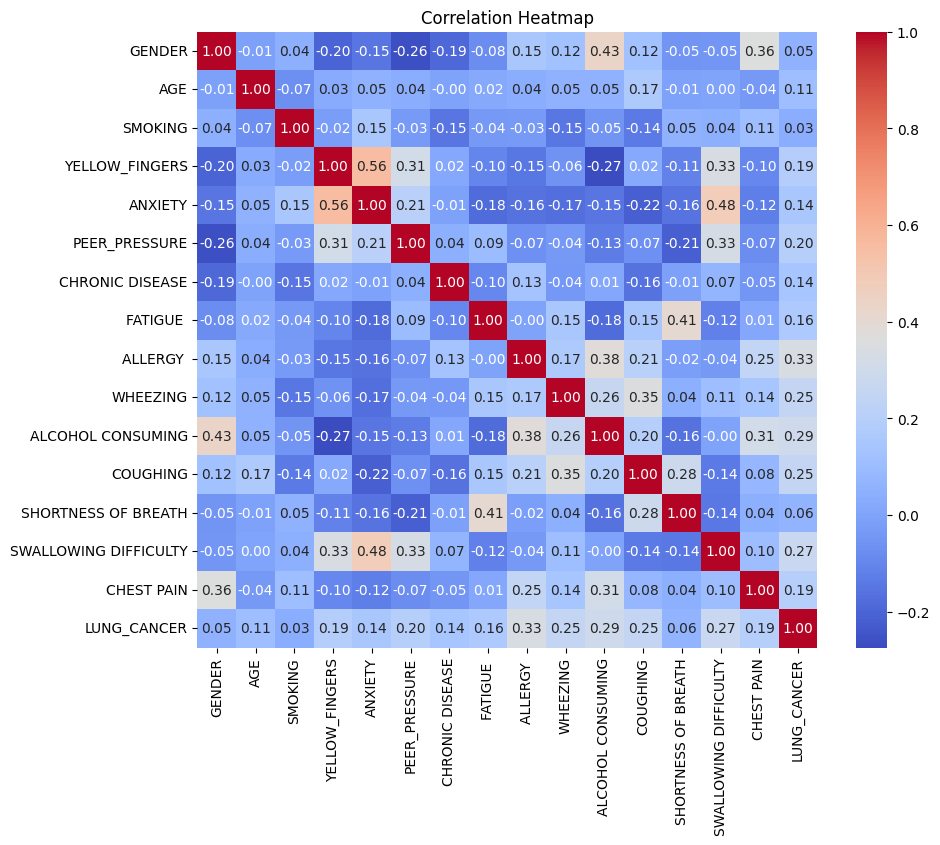

In [20]:
import seaborn as sns
# Assuming 'data' is your DataFrame
# Drop non-numeric columns or encode them
numeric_data = data.select_dtypes(include=[np.number]) # include numric only

# Generate the heatmap with correlation values annotated
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Lung cancer is more strongly influenced by allergies and alcohol consuming**

In [21]:
data.columns.tolist()

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

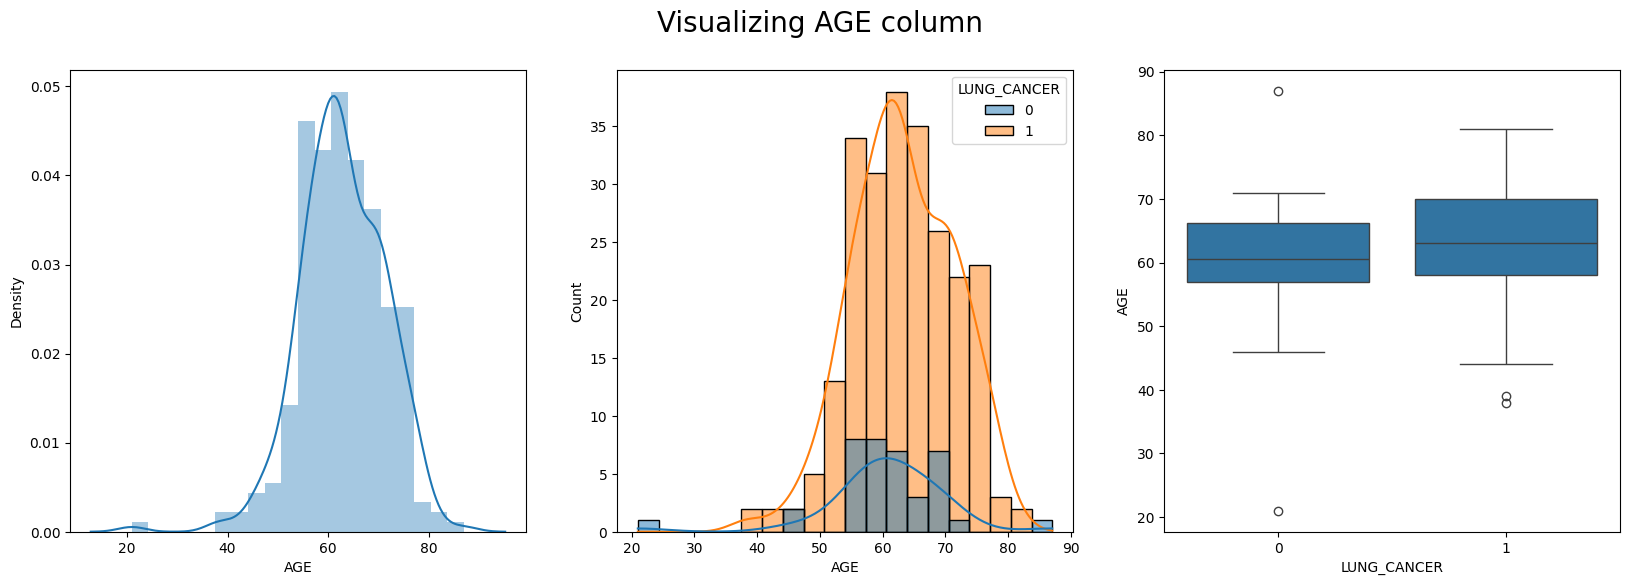

In [22]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.distplot(data['AGE'],ax=ax[0])
sns.histplot(data =data,x='AGE',ax=ax[1],hue='LUNG_CANCER',kde=True)
sns.boxplot(x=data['LUNG_CANCER'],y=data['AGE'],ax=ax[2])
plt.suptitle("Visualizing AGE column",size=20)
plt.show()

**I observed that the age feature follows a normal distribution and** 
**the Men are at a higher risk of developing lung cancer**

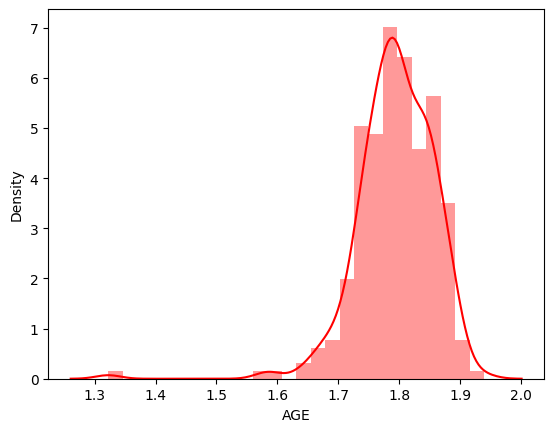

In [23]:
ax = sns.distplot(np.log10(data['AGE']), kde = True, color = 'r' )


**why did i take the log of age featue because i want to make sure that age have alredy normal distribution**


Text(0.5, 0.98, 'Visualizing Binary Columns')

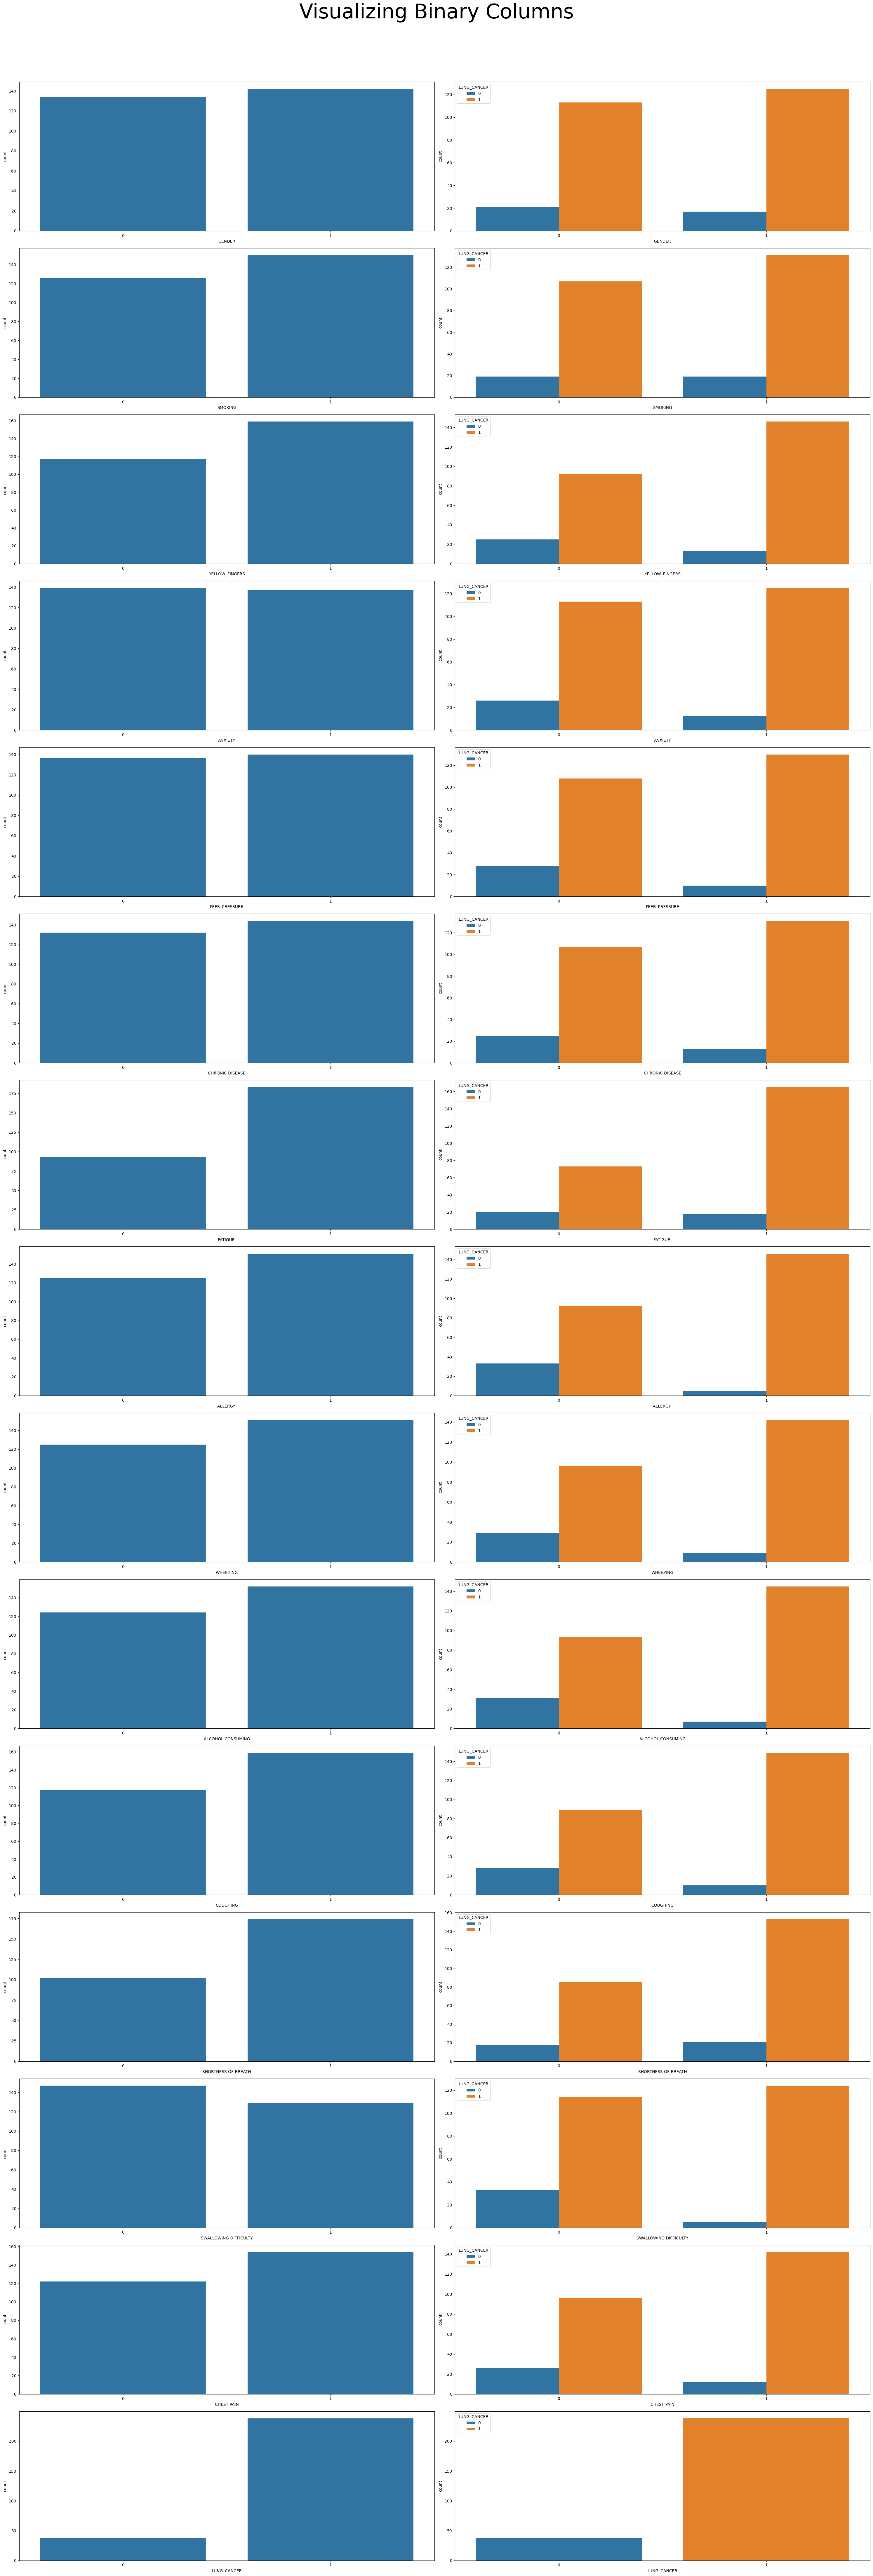

In [24]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=data,x=i,ax=ax[index,0])
    sns.countplot(data=data,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Binary Columns",fontsize=50)

In [25]:

# from lazypredict.Supervised import LazyRegressor
# from lazypredict.Supervised import LazyClassifier

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Separating Independent and Dependent Features</b></p>
</div>

In [26]:
X = data.drop(['LUNG_CANCER'] , axis=1)
Y = data['LUNG_CANCER']

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Train Test Split</b></p>
</div>

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 LogisticRegression |  - 91%</b></p>
</div>

In [28]:
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# feature_importance = model.coef_[0]



Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉  SVM |  - 93 %</b></p>
</div>

In [29]:
from sklearn import metrics
from sklearn import svm

n_features = X.shape[1]  # Number of features

# Generate generic feature names
feature_names = [f"Feature {i+1}" for i in range(n_features)]

clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)
print('accuracy;',metrics.accuracy_score(y_test,y_pred)*100)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))

# Print feature importance along with feature names
# print("Feature Importance:")
# for i, (feature, importance) in enumerate(zip(feature_names, feature_importance)):
#     print(f"{feature}: Importance: {importance}")

accuracy; 92.85714285714286
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 SVM after hyper parameter tunning called optuna |  - 95%</b></p>
</div>

In [30]:
from sklearn.svm import SVC
# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    coef0 = trial.suggest_uniform('coef0', 0.0, 1.0) if kernel in ['poly', 'sigmoid'] else 0.0

    # Define the model
    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0)

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Create the Optuna study and optimize it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best trial
print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

# Train and evaluate the final model
best_params = trial.params
final_model = SVC(**best_params)
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)

print('Final model accuracy:', final_accuracy)
import joblib

# Save the final model
joblib.dump(final_model, 'final_svm_model.pkl')

[I 2024-05-23 15:12:02,315] A new study created in memory with name: no-name-59deea03-49db-4133-b997-078b85caf158
[I 2024-05-23 15:12:02,341] Trial 0 finished with value: 0.7857142857142857 and parameters: {'C': 0.0010514652055277623, 'kernel': 'linear', 'gamma': 'auto'}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-05-23 15:12:02,356] Trial 1 finished with value: 0.7857142857142857 and parameters: {'C': 0.15644881724572782, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': 0.11019684756708092}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-05-23 15:12:02,366] Trial 2 finished with value: 0.7857142857142857 and parameters: {'C': 51.47853731010524, 'kernel': 'sigmoid', 'gamma': 'auto', 'coef0': 0.5235307303314826}. Best is trial 0 with value: 0.7857142857142857.
[I 2024-05-23 15:12:02,377] Trial 3 finished with value: 0.7857142857142857 and parameters: {'C': 0.00010256275624667728, 'kernel': 'sigmoid', 'gamma': 'scale', 'coef0': 0.9764994903304106}. Best is trial 0 wi

Number of finished trials: 50
Best trial:
  Value: 0.9642857142857143
  Params: 
    C: 1.5998571959563839
    kernel: poly
    degree: 2
    gamma: auto
    coef0: 0.70954469778658
Final model accuracy: 0.9642857142857143


['final_svm_model.pkl']

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 confusion matrix |  - </b></p>
</div>

Confusion Matrix:
[[ 9  3]
 [ 0 44]]


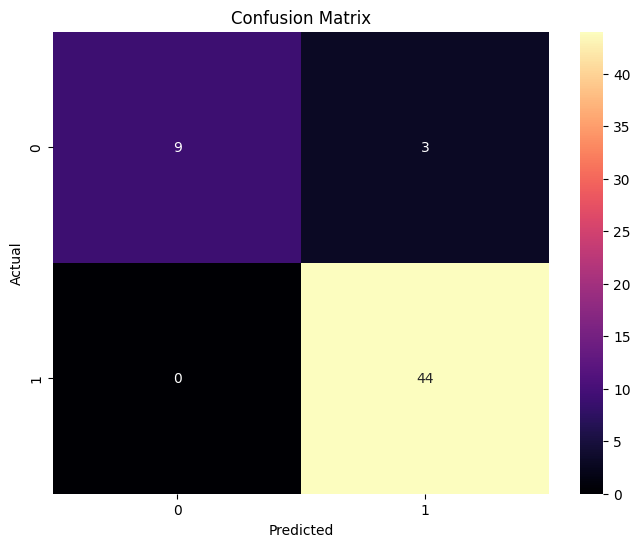

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
conf_matrix = confusion_matrix(y_test, final_y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Optionally, visualize the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 DecisionTreeClassifier |  - 91%</b></p>
</div>

In [33]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Train the classifier on the entire training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Cross-Validation Scores: [0.88636364 0.88636364 0.86363636 0.77272727 0.93181818]
Mean Accuracy: 0.8681818181818182
Accuracy: 0.9107142857142857
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56



**applying Stratified Cross-Validation to see there is a difference between kfold and Stratified Cross-Validation
or not**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Define the stratified k-fold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=stratified_kfold)

# Train the classifier on the entire training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



**as shown stratified is better in cross-validation**

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;coaor:white;"><b>👉 RandomForestClassifier |  - 93%</b></p>
</div>

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=4, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

print(classification_report(y_test, y_pred))


Accuracy: 92.85714285714286
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        44

    accuracy                           0.93        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.93      0.93      0.93        56



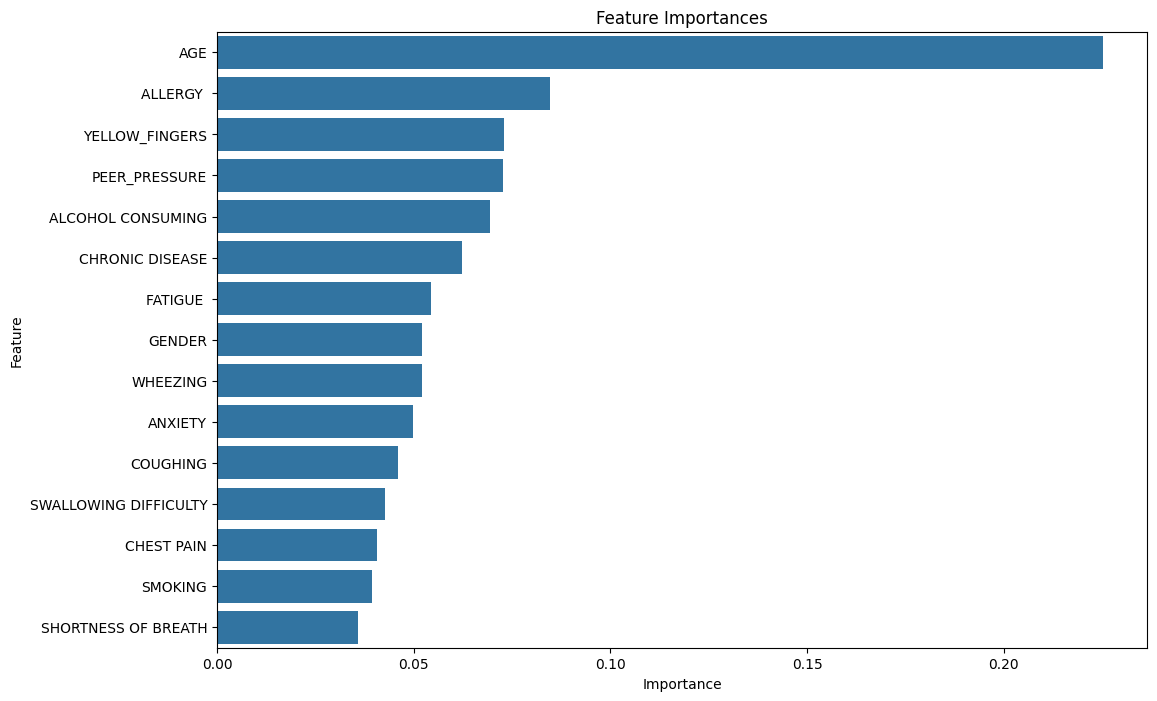

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [42]:
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report





# clf = RandomForestClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'criterion': ['gini', 'entropy']
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# # Fit GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best estimator
# best_clf = grid_search.best_estimator_

# # Train the classifier on the training data with the best parameters
# best_clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = best_clf.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy*100)

# # Additional evaluation metrics
# print(classification_report(y_test, y_pred))

# # Best parameters from GridSearch
# print("Best parameters found by GridSearch:", grid_search.best_params_)


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;coaor:white;"><b>👉 ensemble learning using Bagging | </b></p>
</div>

In [43]:

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize base classifiers
svm_classifier = SVC()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
nb_classifier = GaussianNB()
lda_classifier = LinearDiscriminantAnalysis()

# Initialize Bagging classifiers with different base models
bagging_svm = BaggingClassifier(svm_classifier, n_estimators=50, random_state=42, bootstrap=True)
bagging_rf = BaggingClassifier(rf_classifier, n_estimators=100, random_state=42, bootstrap=True)
bagging_nb = BaggingClassifier(nb_classifier, n_estimators=100, random_state=42, bootstrap=True)
bagging_lda = BaggingClassifier(lda_classifier, n_estimators=100, random_state=42, bootstrap=True)

# Train Bagging classifiers on the training data
bagging_svm.fit(X_train, y_train)
bagging_rf.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)
bagging_lda.fit(X_train, y_train)

y_pred_svm = bagging_svm.predict(X_test)
y_pred_rf = bagging_rf.predict(X_test)
y_pred_nb = bagging_nb.predict(X_test)
y_pred_lda = bagging_lda.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("Accuracy of Bagging with SVM:", accuracy_svm*100)
print("Accuracy of Bagging with Random Forest:", accuracy_rf*100)
print("Accuracy of Bagging with Naive Bayes:", accuracy_nb*100)
print("Accuracy of Bagging with LDA:", accuracy_lda*100)


Accuracy of Bagging with SVM: 78.57142857142857
Accuracy of Bagging with Random Forest: 83.92857142857143
Accuracy of Bagging with Naive Bayes: 91.07142857142857
Accuracy of Bagging with LDA: 92.85714285714286


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;coaor:white;"><b>👉 Boosting |  </b></p>
</div>

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Initialize SVM classifier with probability estimates
svm = SVC(probability=True, kernel='linear', random_state=42)

# Initialize AdaBoost classifier with SVM as base estimator
ada_boost_svm = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train AdaBoost classifier on the training data
ada_boost_svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ada_boost_svm.predict(X_test)

# Calculate the accuracy of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of AdaBoost with SVM Classifier:", accuracy * 100)



Accuracy of AdaBoost with SVM Classifier: 87.5


In [45]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize AdaBoost classifier
ada_boost_rf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Define k-fold cross-validation
cv_scores = cross_val_score(ada_boost_rf, X_train, y_train, cv=kf)  # Perform cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())



Cross-Validation Scores: [0.88636364 0.90909091 0.86363636 0.93181818 0.88636364]
Mean Accuracy: 0.8954545454545455


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;coaor:white;"><b>👉 Voting |  - 91%</b></p>
</div>

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Initialize base classifiers
svm_classifier = SVC()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
nb_classifier = GaussianNB()
lda_classifier = LinearDiscriminantAnalysis()

# Initialize Voting classifier with different base models
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_classifier),
    ('random_forest', rf_classifier),
    ('naive_bayes', nb_classifier),
    ('lda', lda_classifier)
], voting='hard')  # Use 'hard' voting for majority rule

# Train Voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_voting = voting_classifier.predict(X_test)

# Calculate the accuracy of the Voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Accuracy of Voting Ensemble:", accuracy_voting*100)
print(classification_report(y_test, y_pred))



Accuracy of Voting Ensemble: 91.07142857142857
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#011f4b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 applying SVM on a GUI by tiknter |  - </b></p>
</div>

In [38]:
import tkinter as tk
import joblib

# load the model
model = joblib.load('final_svm_model.pkl')
'''

'''

'\n\n'

In [39]:
import tkinter as tk
from tkinter import messagebox
import joblib

# Load the trained model
model = joblib.load('final_svm_model.pkl')

# Function to get the prediction based on user input
def predict():
    GENDER = float(GENDER_entry.get())
    AGE = float(AGE_entry.get())
    SMOKING = float(SMOKING_entry.get())
    YELLOW_FINGERS = float(YELLOW_FINGERS_entry.get())
    ANXIETY = float(ANXIETY_entry.get())
    PEER_PRESSURE = float(PEER_PRESSURE_entry.get())
    CHRONIC_DISEASE = float(CHRONIC_DISEASE_entry.get())
    FATIGUE = float(FATIGUE_entry.get())
    ALLERGY = float(ALLERGY_entry.get())
    WHEEZING = float(WHEEZING_entry.get())
    ALCOHOL_CONSUMING = float(ALCOHOL_CONSUMING_entry.get())
    COUGHING = float(COUGHING_entry.get())
    SHORTNESS_OF_BREATH = float(SHORTNESS_OF_BREATH_entry.get())
    SWALLOWING_DIFFICULTY = float(SWALLOWING_DIFFICULTY_entry.get())
    CHEST_PAIN = float(CHEST_PAIN_entry.get())

    # Make the prediction
    prediction = model.predict([[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY, WHEEZING, ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN]])

    # Update the prediction label
    result_label.configure(text="Prediction: {}".format(prediction[0]))

# Create the GUI
root = tk.Tk()
root.geometry("600x800+400+100")
root.title("Lung Cancer Prediction")

# Add input fields for the features
GENDER_entry = tk.Entry(root)
AGE_entry = tk.Entry(root)
SMOKING_entry = tk.Entry(root)
YELLOW_FINGERS_entry = tk.Entry(root)
ANXIETY_entry = tk.Entry(root)
PEER_PRESSURE_entry = tk.Entry(root)
CHRONIC_DISEASE_entry = tk.Entry(root)
FATIGUE_entry = tk.Entry(root)
ALLERGY_entry = tk.Entry(root)
WHEEZING_entry = tk.Entry(root)
ALCOHOL_CONSUMING_entry = tk.Entry(root)
COUGHING_entry = tk.Entry(root)
SHORTNESS_OF_BREATH_entry = tk.Entry(root)
SWALLOWING_DIFFICULTY_entry = tk.Entry(root)
CHEST_PAIN_entry = tk.Entry(root)

# Add labels for the input fields
GENDER_label = tk.Label(root, text="GENDER:", font=("Arial Bold", 12))
AGE_label = tk.Label(root, text="AGE:", font=("Arial Bold", 12))
SMOKING_label = tk.Label(root, text="SMOKING:", font=("Arial Bold", 12))
YELLOW_FINGERS_label = tk.Label(root, text="YELLOW FINGERS:", font=("Arial Bold", 12))
ANXIETY_label = tk.Label(root, text="ANXIETY:", font=("Arial Bold", 12))
PEER_PRESSURE_label = tk.Label(root, text="PEER PRESSURE:", font=("Arial Bold", 12))
CHRONIC_DISEASE_label = tk.Label(root, text="CHRONIC DISEASE:", font=("Arial Bold", 12))
FATIGUE_label = tk.Label(root, text="FATIGUE:", font=("Arial Bold", 12))
ALLERGY_label = tk.Label(root, text="ALLERGY:", font=("Arial Bold", 12))
WHEEZING_label = tk.Label(root, text="WHEEZING:", font=("Arial Bold", 12))
ALCOHOL_CONSUMING_label = tk.Label(root, text="ALCOHOL CONSUMING:", font=("Arial Bold", 12))
COUGHING_label = tk.Label(root, text="COUGHING:", font=("Arial Bold", 12))
SHORTNESS_OF_BREATH_label = tk.Label(root, text="SHORTNESS OF BREATH:", font=("Arial Bold", 12))
SWALLOWING_DIFFICULTY_label = tk.Label(root, text="SWALLOWING DIFFICULTY:", font=("Arial Bold", 12))
CHEST_PAIN_label = tk.Label(root, text="CHEST PAIN:", font=("Arial Bold", 12))

# Add button to make prediction
predict_button = tk.Button(root, text="Predict", font=('Arial', 14), command=predict)

# Add label to display the prediction
result_label = tk.Label(root, text="Prediction: ", font=('Arial', 14))

# Place the input fields and labels on the GUI
GENDER_label.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
GENDER_entry.grid(row=0, column=1, padx=5, pady=5, sticky=tk.W)
AGE_label.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)
AGE_entry.grid(row=1, column=1, padx=5, pady=5, sticky=tk.W)
SMOKING_label.grid(row=2, column=0, padx=5, pady=5, sticky=tk.W)
SMOKING_entry.grid(row=2, column=1, padx=5, pady=5, sticky=tk.W)
YELLOW_FINGERS_label.grid(row=3, column=0, padx=5, pady=5, sticky=tk.W)
YELLOW_FINGERS_entry.grid(row=3, column=1, padx=5, pady=5, sticky=tk.W)
ANXIETY_label.grid(row=4, column=0, padx=5, pady=5, sticky=tk.W)
ANXIETY_entry.grid(row=4, column=1, padx=5, pady=5, sticky=tk.W)
PEER_PRESSURE_label.grid(row=5, column=0, padx=5, pady=5, sticky=tk.W)
PEER_PRESSURE_entry.grid(row=5, column=1, padx=5, pady=5, sticky=tk.W)
CHRONIC_DISEASE_label.grid(row=6, column=0, padx=5, pady=5, sticky=tk.W)
CHRONIC_DISEASE_entry.grid(row=6, column=1, padx=5, pady=5, sticky=tk.W)
FATIGUE_label.grid(row=7, column=0, padx=5, pady=5, sticky=tk.W)
FATIGUE_entry.grid(row=7, column=1, padx=5, pady=5, sticky=tk.W)
ALLERGY_label.grid(row=8, column=0, padx=5, pady=5, sticky=tk.W)
ALLERGY_entry.grid(row=8, column=1, padx=5, pady=5, sticky=tk.W)
WHEEZING_label.grid(row=9, column=0, padx=5, pady=5, sticky=tk.W)
WHEEZING_entry.grid(row=9, column=1, padx=5, pady=5, sticky=tk.W)
ALCOHOL_CONSUMING_label.grid(row=10, column=0, padx=5, pady=5, sticky=tk.W)
ALCOHOL_CONSUMING_entry.grid(row=10, column=1, padx=5, pady=5, sticky=tk.W)
COUGHING_label.grid(row=11, column=0, padx=5, pady=5, sticky=tk.W)
COUGHING_entry.grid(row=11, column=1, padx=5, pady=5, sticky=tk.W)
SHORTNESS_OF_BREATH_label.grid(row=12, column=0, padx=5, pady=5, sticky=tk.W)
SHORTNESS_OF_BREATH_entry.grid(row=12, column=1, padx=5, pady=5, sticky=tk.W)
SWALLOWING_DIFFICULTY_label.grid(row=13, column=0, padx=5, pady=5, sticky=tk.W)
SWALLOWING_DIFFICULTY_entry.grid(row=13, column=1, padx=5, pady=5, sticky=tk.W)
CHEST_PAIN_label.grid(row=14, column=0, padx=5, pady=5, sticky=tk.W)
CHEST_PAIN_entry.grid(row=14, column=1, padx=5, pady=5, sticky=tk.W)

# Place the predict button and result label on the GUI
predict_button.grid(row=15, column=0, columnspan=2, padx=5, pady=5, sticky=tk.W)
result_label.grid(row=16, column=0, columnspan=2, padx=5, pady=5, sticky=tk.W)

# Start the GUI
root.mainloop()

